In [6]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import copy
np.random.seed(0)

In [2]:
###### part (a) wine dataset
wine = datasets.load_wine()
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=2)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')

train_acc: 95.50561797752809%, test_acc: 86.51685393258427%


[Text(279.0, 271.8, 'X[12] <= 755.0\ngini = 0.66\nsamples = 89\nvalue = [34, 31, 24]'),
 Text(139.5, 163.08, 'X[11] <= 2.225\ngini = 0.488\nsamples = 52\nvalue = [0, 30, 22]'),
 Text(69.75, 54.360000000000014, 'gini = 0.159\nsamples = 23\nvalue = [0, 2, 21]'),
 Text(209.25, 54.360000000000014, 'gini = 0.067\nsamples = 29\nvalue = [0, 28, 1]'),
 Text(418.5, 163.08, 'X[11] <= 2.195\ngini = 0.152\nsamples = 37\nvalue = [34, 1, 2]'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]')]

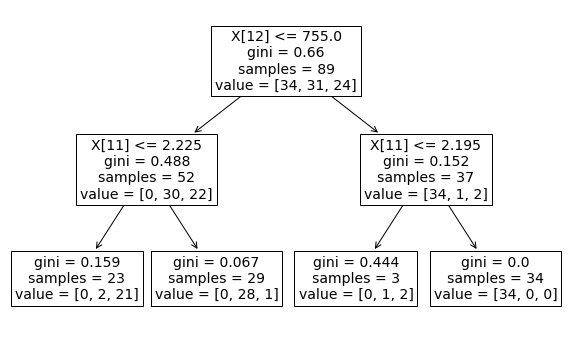

In [3]:
plt.figure(figsize=(10,6))
tree.plot_tree(clf, fontsize=14)

In [4]:
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train accuracy mean: 71.68539325842698%, stdev: 12.798142460848595%
test accuracy mean: 65.29213483146069%, stdev: 11.6322202051304%


In [5]:
###### part (b) split ########
wine = datasets.load_wine()
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=2)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train_acc: 95.48872180451127%, test_acc: 84.44444444444444%
train accuracy mean: 69.50375939849624%, stdev: 12.065418008471463%
test accuracy mean: 63.711111111111116%, stdev: 12.472409055764688%


In [7]:
###### part (c) entropy ########
wine = datasets.load_wine()
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, max_depth=2)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train_acc: 96.99248120300751%, test_acc: 95.55555555555556%
train accuracy mean: 71.91729323308272%, stdev: 9.340497736158587%
test accuracy mean: 73.44444444444443%, stdev: 11.616824750505218%
